<a href="https://colab.research.google.com/github/aalokhya11/NLP_LAB/blob/main/nlp_ASSIGNMENT10_L31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT-10

     Course Name: Natural Language Processing
     
     Date: 02/09/2024



1.Generative models are a class of machine learning models that generate new data instances that resemble your training data. These models can be used for various tasks, such as creating realistic images, text, or even music. In this lab assignment, we'll focus on implementing and training generative models, particularly a Variational Autoencoder (VAE) and a Generative Adversarial Network (GAN), using a simple dataset like MNIST or a text dataset for generating synthetic samples. [CO5]

(i) Impliment Variational Autoencoder (VAE)

In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim

# Simple VAE model
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(784, 400)
        self.fc21 = nn.Linear(400, 20)  # mean
        self.fc22 = nn.Linear(400, 20)  # log variance
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, 784)

    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h3 = torch.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Loss function
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Load dataset
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Initialize model and optimizer
vae = VAE()
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# Train VAE
vae.train()
for epoch in range(10):
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.view(-1, 784)
        optimizer.zero_grad()
        recon_batch, mu, logvar = vae(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# VAE is now trained


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 57330942.11it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1781145.33it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14636063.77it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3703446.49it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1, Loss: 3939.896728515625
Epoch 2, Loss: 3378.41064453125
Epoch 3, Loss: 3284.166259765625
Epoch 4, Loss: 3698.093994140625
Epoch 5, Loss: 3748.915771484375
Epoch 6, Loss: 3621.83154296875
Epoch 7, Loss: 3124.69287109375
Epoch 8, Loss: 3339.583984375
Epoch 9, Loss: 3436.8671875
Epoch 10, Loss: 3345.48388671875


(ii) Implement the GAN



In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Generator model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Tanh()
        )

    def forward(self, x):
        return self.fc(x)

# Discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

# Initialize models
generator = Generator()
discriminator = Discriminator()

# Loss and optimizer
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002)

# Load dataset
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Train GAN
for epoch in range(10):
    for batch_idx, (data, _) in enumerate(train_loader):
        # Train Discriminator
        real_data = data.view(-1, 784)
        real_labels = torch.ones(data.size(0), 1)
        fake_labels = torch.zeros(data.size(0), 1)

        optimizer_d.zero_grad()
        outputs = discriminator(real_data)
        d_loss_real = criterion(outputs, real_labels)
        d_loss_real.backward()

        z = torch.randn(data.size(0), 100)
        fake_data = generator(z)
        outputs = discriminator(fake_data.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        d_loss_fake.backward()
        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()
        outputs = discriminator(fake_data)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        optimizer_g.step()

    print(f'Epoch {epoch+1}, D Loss: {d_loss_real.item() + d_loss_fake.item()}, G Loss: {g_loss.item()}')

# GAN is now trained


Epoch 1, D Loss: 1.2360276579856873, G Loss: 0.7391989231109619
Epoch 2, D Loss: 1.0804136395454407, G Loss: 0.9182188510894775
Epoch 3, D Loss: 1.1224502325057983, G Loss: 1.1404750347137451
Epoch 4, D Loss: 1.1665889024734497, G Loss: 1.1396034955978394
Epoch 5, D Loss: 1.0465819537639618, G Loss: 1.2054048776626587
Epoch 6, D Loss: 0.8831552565097809, G Loss: 1.2254788875579834
Epoch 7, D Loss: 0.991964727640152, G Loss: 1.2882705926895142
Epoch 8, D Loss: 0.8660796880722046, G Loss: 1.4542104005813599
Epoch 9, D Loss: 0.6546351313591003, G Loss: 1.5817378759384155
Epoch 10, D Loss: 0.941202312707901, G Loss: 1.4545873403549194


(iii) Visualize the latent space and generated images to understand how well the model captures the data distribution.

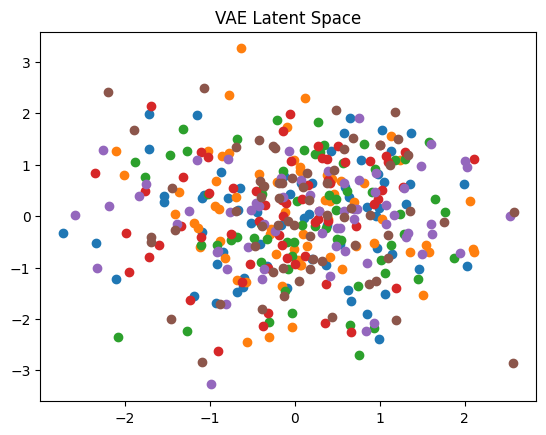

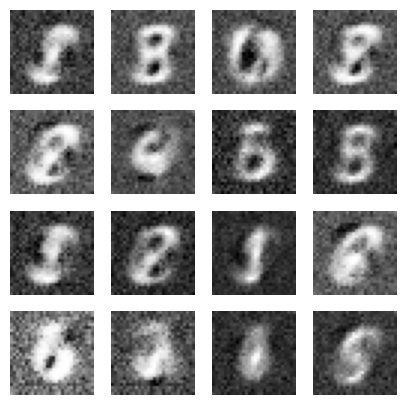

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize VAE latent space (use trained VAE model)
def visualize_vae_latent_space(vae, data_loader):
    vae.eval()
    with torch.no_grad():
        for batch_idx, (data, _) in enumerate(data_loader):
            mu, logvar = vae.encode(data.view(-1, 784))
            z = vae.reparameterize(mu, logvar)
            plt.scatter(z[:, 0].cpu(), z[:, 1].cpu())
            if batch_idx == 5:  # Visualize a few batches
                break
    plt.title("VAE Latent Space")
    plt.show()

# Visualize the GAN generated images
def visualize_gan_images(generator, num_images=16):
    generator.eval()
    z = torch.randn(num_images, 100)
    with torch.no_grad():
        generated_images = generator(z)
        generated_images = generated_images.view(num_images, 28, 28).cpu().numpy()

    fig, axes = plt.subplots(4, 4, figsize=(5, 5))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(generated_images[i], cmap='gray')
        ax.axis('off')
    plt.show()

# Call visualization functions
# Assuming 'vae' and 'generator' are trained from previous sections
visualize_vae_latent_space(vae, train_loader)
visualize_gan_images(generator)
